In [2]:
!pip install scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_regression

from sklearn import tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

from scipy import stats

In [32]:
df=pd.read_csv('landslide_data.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,rainfall
0,1,247.0482,664.8308,65600.0,1.0,3.020935,-2.463763,0.557172,0.139255,37.5,...,NaN,NaN,20.00000,0.0,NaN,11.15498,NaN,NaN,NaN,0.000000
1,2,253.3718,642.8063,65600.0,1.0,-1.277527,0.557914,-0.719612,0.130121,15.0,...,NaN,NaN,40.00000,0.0,NaN,13.46830,2033.702,1.0,NaN,9.595541
2,3,265.2971,644.9806,65600.0,1.0,-2.156464,0.636057,-1.520407,0.214373,25.0,...,10.0,1.0,28.28427,0.0,23.0,15.34650,2024.026,1.0,19.0,13.977184
3,4,267.3936,647.7654,65600.0,1.0,2.616730,-2.301352,0.315377,0.135763,40.0,...,10.0,1.0,20.00000,0.0,23.0,12.92921,2015.106,1.0,19.0,11.865290
4,5,NaN,651.1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,1.0,0.00000,1.0,23.0,NaN,NaN,1.0,19.0,0.000000


In [33]:
df = df.apply(pd.to_numeric, errors='coerce')

In [34]:
df = df.replace('MISSING', np.nan)
df.isnull().sum()

,0
ID,0
aspect,144
strdist,0
basarea,163
basin,163
curvature,163
curve_cont,163
curve_prof,163
curves,163
drop,163


In [35]:
df_clean = df.replace('MISSING', np.nan).dropna().reset_index(drop=True)
print('After Data Cleaning:', np.size(df))
df_clean.isnull().sum()

After Data Cleaning: 525250


,0
ID,0
aspect,0
strdist,0
basarea,0
basin,0
curvature,0
curve_cont,0
curve_prof,0
curves,0
drop,0


In [36]:
df_clean.describe()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,rainfall
count,20661.000000,20661.000000,20661.000000,2.066100e+04,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,...,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000,20661.000000
mean,10478.636368,204.018024,80.665612,3.241700e+06,19.252166,0.006720,0.017645,0.024366,0.175299,28.572351,...,18.162722,0.441847,58.774815,0.220028,23.093800,15.584957,549.720544,0.754126,21.522676,9.958804
std,6036.305317,68.062884,91.099048,2.290549e+06,8.308838,1.449008,0.978573,0.706617,0.100408,20.892710,...,14.504826,1.138633,65.399292,0.414275,10.117792,8.733018,252.707664,0.430615,1.940632,6.761502
min,3.000000,0.005397,0.000000,1.200000e+03,1.000000,-10.811370,-12.574080,-7.542503,0.000497,1.666667,...,10.000000,0.000000,0.000000,0.000000,17.000000,0.157048,44.721360,0.000000,19.000000,0.000000
25%,5257.000000,169.836800,20.000000,3.892000e+05,17.000000,-0.667679,-0.389920,-0.282483,0.104197,15.000000,...,10.000000,0.000000,20.000000,0.000000,17.000000,9.456009,389.974900,1.000000,20.000000,3.746042
50%,10469.000000,210.545800,56.568540,5.068000e+06,17.000000,0.019348,0.006627,0.031532,0.156651,25.000000,...,10.000000,0.000000,40.000000,0.000000,17.000000,13.917670,503.590000,1.000000,20.000000,11.071899
75%,15694.000000,242.509700,101.980400,5.068000e+06,18.000000,0.658142,0.406648,0.328313,0.224142,36.666670,...,20.000000,1.000000,84.852810,0.000000,25.000000,19.845680,650.034200,1.000000,23.000000,15.009570
max,20998.000000,359.918700,647.765400,5.068000e+06,51.000000,29.113010,10.524320,16.538930,0.736142,265.000000,...,50.000000,10.000000,382.099500,1.000000,45.000000,65.599170,2024.026000,1.000000,25.000000,30.651512


In [37]:
df_clean.head(10)

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,rainfall
0,3,265.2971,644.9806,65600.0,1.0,-2.156464,0.636057,-1.520407,0.214373,25.0,...,10.0,1.0,28.28427,0.0,23.0,15.346500,2024.026,1.0,19.0,13.977184
1,4,267.3936,647.7654,65600.0,1.0,2.616730,-2.301352,0.315377,0.135763,40.0,...,10.0,1.0,20.00000,0.0,23.0,12.929210,2015.106,1.0,19.0,11.865290
2,7,272.0991,625.1400,65600.0,1.0,0.029022,-0.073801,-0.044779,0.164955,25.0,...,10.0,1.0,20.00000,0.0,23.0,16.343020,1985.669,1.0,19.0,12.022746
3,8,272.9689,628.0128,65600.0,1.0,-1.793457,0.881960,-0.911497,0.215654,25.0,...,10.0,1.0,20.00000,0.0,23.0,16.766640,1976.543,1.0,19.0,12.024027
4,9,261.2346,631.5062,65600.0,1.0,2.723572,-2.240553,0.483019,0.142164,42.5,...,10.0,1.0,20.00000,0.0,23.0,13.314640,1968.201,1.0,19.0,6.467361
5,12,287.9410,602.9926,65600.0,1.0,0.380432,-0.176626,0.203806,0.201194,37.5,...,10.0,0.0,0.00000,1.0,23.0,17.375300,1957.517,1.0,19.0,3.017535
6,13,298.5974,605.3098,65600.0,1.0,-1.952148,1.037233,-0.914915,0.198204,20.0,...,10.0,0.0,0.00000,1.0,23.0,17.050100,1947.396,1.0,19.0,8.881980
7,14,291.1888,608.2762,65600.0,1.0,-1.282166,0.188655,-1.093511,0.214908,27.5,...,10.0,0.0,0.00000,1.0,23.0,17.745330,1938.055,1.0,19.0,7.868412
8,15,290.8967,611.8823,65600.0,1.0,-2.048645,0.311583,-1.737062,0.179461,25.0,...,10.0,0.0,0.00000,1.0,23.0,14.224400,1929.510,1.0,19.0,11.073473
9,16,294.2935,616.1169,65600.0,1.0,0.494263,-0.443940,0.050323,0.106264,27.5,...,10.0,1.0,0.00000,1.0,23.0,8.867694,1921.777,1.0,19.0,10.226385


In [38]:
df_clean['aspect'] = pd.to_numeric(df_clean['aspect'], errors='coerce')

In [39]:
for i in range(len(df_clean)):
    df_clean['aspect'][i] = np.cos((df_clean['aspect'][i]*np.pi)/180)
    if df_clean['aspect'][i] > 0:
        df_clean['aspect'][i] = 1
    else:
        df_clean['aspect'][i] = 0

df_clean.head(10)

Streaming output truncated to the last 5000 lines.
<ipython-input-39-22cff9aaf2ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['aspect'][i] = np.cos((df_clean['aspect'][i]*np.pi)/180)
<ipython-input-39-22cff9aaf2ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['aspect'][i] = 0
<ipython-input-39-22cff9aaf2ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['aspect'][i] = np.cos((df_clean['aspect'][i]

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,rainfall
0,3,0.0,644.9806,65600.0,1.0,-2.156464,0.636057,-1.520407,0.214373,25.0,...,10.0,1.0,28.28427,0.0,23.0,15.346500,2024.026,1.0,19.0,13.977184
1,4,0.0,647.7654,65600.0,1.0,2.616730,-2.301352,0.315377,0.135763,40.0,...,10.0,1.0,20.00000,0.0,23.0,12.929210,2015.106,1.0,19.0,11.865290
2,7,1.0,625.1400,65600.0,1.0,0.029022,-0.073801,-0.044779,0.164955,25.0,...,10.0,1.0,20.00000,0.0,23.0,16.343020,1985.669,1.0,19.0,12.022746
3,8,1.0,628.0128,65600.0,1.0,-1.793457,0.881960,-0.911497,0.215654,25.0,...,10.0,1.0,20.00000,0.0,23.0,16.766640,1976.543,1.0,19.0,12.024027
4,9,0.0,631.5062,65600.0,1.0,2.723572,-2.240553,0.483019,0.142164,42.5,...,10.0,1.0,20.00000,0.0,23.0,13.314640,1968.201,1.0,19.0,6.467361
5,12,1.0,602.9926,65600.0,1.0,0.380432,-0.176626,0.203806,0.201194,37.5,...,10.0,0.0,0.00000,1.0,23.0,17.375300,1957.517,1.0,19.0,3.017535
6,13,1.0,605.3098,65600.0,1.0,-1.952148,1.037233,-0.914915,0.198204,20.0,...,10.0,0.0,0.00000,1.0,23.0,17.050100,1947.396,1.0,19.0,8.881980
7,14,1.0,608.2762,65600.0,1.0,-1.282166,0.188655,-1.093511,0.214908,27.5,...,10.0,0.0,0.00000,1.0,23.0,17.745330,1938.055,1.0,19.0,7.868412
8,15,1.0,611.8823,65600.0,1.0,-2.048645,0.311583,-1.737062,0.179461,25.0,...,10.0,0.0,0.00000,1.0,23.0,14.224400,1929.510,1.0,19.0,11.073473
9,16,1.0,616.1169,65600.0,1.0,0.494263,-0.443940,0.050323,0.106264,27.5,...,10.0,1.0,0.00000,1.0,23.0,8.867694,1921.777,1.0,19.0,10.226385


In [40]:
class_fos_5 = []
for i in np.arange(5):
    class_fos_5.append('fos_'+str(i+1))

In [41]:
# Convert 'fos' column to numeric type, handling errors by coercing to NaN
df_clean['fos'] = pd.to_numeric(df_clean['fos'], errors='coerce')


df_clean['fos_5th_class'] = pd.qcut(df_clean['fos'], q=5, labels=class_fos_5)
df_clean[['fos','fos_5th_class']]

,fos,fos_5th_class
0,1.318290,fos_3
1,1.094124,fos_2
2,1.029149,fos_2
3,1.048767,fos_2
4,1.007705,fos_2
...,...,...
20656,4.778810,fos_5
20657,4.338595,fos_5
20658,8.775199,fos_5
20659,5.946122,fos_5


Text(0.5, 1.0, 'FoS Binning')

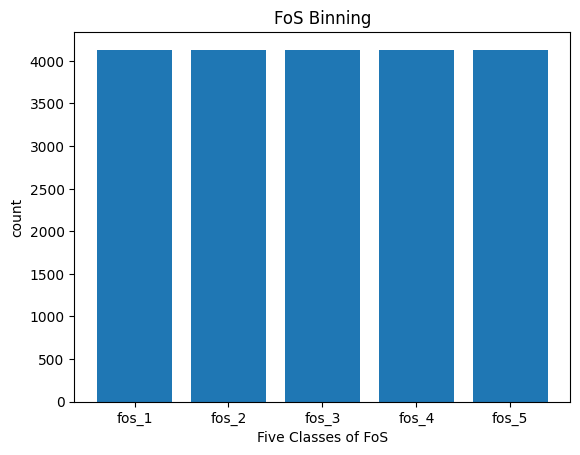

In [42]:
plt.bar(class_fos_5, df_clean["fos_5th_class"].value_counts())
plt.xlabel("Five Classes of FoS")
plt.ylabel("count")
plt.title("FoS Binning")

In [43]:
fos = pd.get_dummies(df_clean["fos_5th_class"])
fos.columns = ['fos_1','fos_2','fos_3','fos_4','fos_5']
df_clean.drop(['fos_5th_class'],axis=1,inplace=True)
df_clean = pd.concat([df_clean,fos],axis=1)

df_clean.head()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,slope,slopeleg,woods,specwt,rainfall,fos_1,fos_2,fos_3,fos_4,fos_5
0,3,0.0,644.9806,65600.0,1.0,-2.156464,0.636057,-1.520407,0.214373,25.0,...,15.34650,2024.026,1.0,19.0,13.977184,False,False,True,False,False
1,4,0.0,647.7654,65600.0,1.0,2.616730,-2.301352,0.315377,0.135763,40.0,...,12.92921,2015.106,1.0,19.0,11.865290,False,True,False,False,False
2,7,1.0,625.1400,65600.0,1.0,0.029022,-0.073801,-0.044779,0.164955,25.0,...,16.34302,1985.669,1.0,19.0,12.022746,False,True,False,False,False
3,8,1.0,628.0128,65600.0,1.0,-1.793457,0.881960,-0.911497,0.215654,25.0,...,16.76664,1976.543,1.0,19.0,12.024027,False,True,False,False,False
4,9,0.0,631.5062,65600.0,1.0,2.723572,-2.240553,0.483019,0.142164,42.5,...,13.31464,1968.201,1.0,19.0,6.467361,False,True,False,False,False


In [44]:
df_clean.corr()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,slope,slopeleg,woods,specwt,rainfall,fos_1,fos_2,fos_3,fos_4,fos_5
ID,1.000000,-0.079310,-0.272694,0.023790,0.609095,-0.003402,0.004278,-0.001053,-0.068717,-0.080363,...,-0.065972,-0.384300,-0.343041,0.127877,0.031199,-0.030023,0.009429,0.046443,-0.005498,-0.020348
aspect,-0.079310,1.000000,0.223450,-0.154948,-0.210646,0.061417,-0.029910,0.084522,0.110930,0.125461,...,0.103262,0.252715,0.089356,0.260639,0.028532,-0.025313,-0.109073,-0.047565,0.034143,0.147810
strdist,-0.272694,0.223450,1.000000,-0.329061,-0.212459,0.065377,-0.039328,0.079600,0.229213,0.239053,...,0.228554,0.544593,0.025883,0.332172,-0.076034,0.000268,-0.114403,-0.071766,0.054039,0.131863
basarea,0.023790,-0.154948,-0.329061,1.000000,-0.351456,-0.009509,-0.007562,-0.029972,-0.164315,-0.141436,...,-0.165685,-0.454538,0.102972,-0.427345,0.119692,0.097508,0.053882,0.018382,-0.058718,-0.111064
basin,0.609095,-0.210646,-0.212459,-0.351456,1.000000,0.009702,-0.003434,0.015139,-0.063599,-0.067074,...,-0.064694,-0.210304,-0.288300,0.144928,-0.064167,-0.086386,0.030468,0.057862,0.009249,-0.011184
curvature,-0.003402,0.061417,0.065377,-0.009509,0.009702,1.000000,-0.901972,0.801512,0.032381,0.448305,...,-0.000166,0.006211,-0.006398,0.120472,0.018451,0.001586,-0.018582,0.019701,-0.008580,0.005876
curve_cont,0.004278,-0.029910,-0.039328,-0.007562,-0.003434,-0.901972,1.000000,-0.464738,0.019641,-0.429765,...,0.057849,0.005369,0.000873,-0.097177,-0.016437,-0.004604,0.007924,-0.015392,0.010508,0.001564
curve_prof,-0.001053,0.084522,0.079600,-0.029972,0.015139,0.801512,-0.464738,1.000000,0.093601,0.324136,...,0.079773,0.020172,-0.011910,0.112465,0.015073,-0.003123,-0.027132,0.019083,-0.003041,0.014214
curves,-0.068717,0.110930,0.229213,-0.164315,-0.063599,0.032381,0.019641,0.093601,1.000000,0.852592,...,0.978702,0.240679,0.216321,0.205833,0.263524,0.350142,0.005025,-0.057937,-0.055028,-0.242234
drop,-0.080363,0.125461,0.239053,-0.141436,-0.067074,0.448305,-0.429765,0.324136,0.852592,1.000000,...,0.832116,0.218044,0.183375,0.240776,0.223218,0.304160,-0.020378,-0.037367,-0.047015,-0.199426


In [45]:
df_clean = df_clean.drop('rockdist', axis=1)
df_clean.corr()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,slope,slopeleg,woods,specwt,rainfall,fos_1,fos_2,fos_3,fos_4,fos_5
ID,1.000000,-0.079310,-0.272694,0.023790,0.609095,-0.003402,0.004278,-0.001053,-0.068717,-0.080363,...,-0.065972,-0.384300,-0.343041,0.127877,0.031199,-0.030023,0.009429,0.046443,-0.005498,-0.020348
aspect,-0.079310,1.000000,0.223450,-0.154948,-0.210646,0.061417,-0.029910,0.084522,0.110930,0.125461,...,0.103262,0.252715,0.089356,0.260639,0.028532,-0.025313,-0.109073,-0.047565,0.034143,0.147810
strdist,-0.272694,0.223450,1.000000,-0.329061,-0.212459,0.065377,-0.039328,0.079600,0.229213,0.239053,...,0.228554,0.544593,0.025883,0.332172,-0.076034,0.000268,-0.114403,-0.071766,0.054039,0.131863
basarea,0.023790,-0.154948,-0.329061,1.000000,-0.351456,-0.009509,-0.007562,-0.029972,-0.164315,-0.141436,...,-0.165685,-0.454538,0.102972,-0.427345,0.119692,0.097508,0.053882,0.018382,-0.058718,-0.111064
basin,0.609095,-0.210646,-0.212459,-0.351456,1.000000,0.009702,-0.003434,0.015139,-0.063599,-0.067074,...,-0.064694,-0.210304,-0.288300,0.144928,-0.064167,-0.086386,0.030468,0.057862,0.009249,-0.011184
curvature,-0.003402,0.061417,0.065377,-0.009509,0.009702,1.000000,-0.901972,0.801512,0.032381,0.448305,...,-0.000166,0.006211,-0.006398,0.120472,0.018451,0.001586,-0.018582,0.019701,-0.008580,0.005876
curve_cont,0.004278,-0.029910,-0.039328,-0.007562,-0.003434,-0.901972,1.000000,-0.464738,0.019641,-0.429765,...,0.057849,0.005369,0.000873,-0.097177,-0.016437,-0.004604,0.007924,-0.015392,0.010508,0.001564
curve_prof,-0.001053,0.084522,0.079600,-0.029972,0.015139,0.801512,-0.464738,1.000000,0.093601,0.324136,...,0.079773,0.020172,-0.011910,0.112465,0.015073,-0.003123,-0.027132,0.019083,-0.003041,0.014214
curves,-0.068717,0.110930,0.229213,-0.164315,-0.063599,0.032381,0.019641,0.093601,1.000000,0.852592,...,0.978702,0.240679,0.216321,0.205833,0.263524,0.350142,0.005025,-0.057937,-0.055028,-0.242234
drop,-0.080363,0.125461,0.239053,-0.141436,-0.067074,0.448305,-0.429765,0.324136,0.852592,1.000000,...,0.832116,0.218044,0.183375,0.240776,0.223218,0.304160,-0.020378,-0.037367,-0.047015,-0.199426


In [46]:
df_clean['lith']

,lith
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
20656,17.0
20657,17.0
20658,17.0
20659,17.0


In [47]:
litho = pd.get_dummies(df_clean["lith"])
litho.columns = ['Limestone', 'Marl', 'Evaporties', 'Rockfall debris', 'Moraine on Marls', 'Moraine Thick', 'Moraine on Evaporites']
df_clean.drop(['lith'],axis=1,inplace=True)
df_clean = pd.concat([df_clean,litho],axis=1)
df_clean.head()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,fos_3,fos_4,fos_5,Limestone,Marl,Evaporties,Rockfall debris,Moraine on Marls,Moraine Thick,Moraine on Evaporites
0,3,0.0,644.9806,65600.0,1.0,-2.156464,0.636057,-1.520407,0.214373,25.0,...,True,False,False,False,False,True,False,False,False,False
1,4,0.0,647.7654,65600.0,1.0,2.616730,-2.301352,0.315377,0.135763,40.0,...,False,False,False,False,False,True,False,False,False,False
2,7,1.0,625.1400,65600.0,1.0,0.029022,-0.073801,-0.044779,0.164955,25.0,...,False,False,False,False,False,True,False,False,False,False
3,8,1.0,628.0128,65600.0,1.0,-1.793457,0.881960,-0.911497,0.215654,25.0,...,False,False,False,False,False,True,False,False,False,False
4,9,0.0,631.5062,65600.0,1.0,2.723572,-2.240553,0.483019,0.142164,42.5,...,False,False,False,False,False,True,False,False,False,False


In [48]:
df_clean['slide'] = pd.to_numeric(df_clean['slide'], errors='coerce')

In [49]:
for i in range(len(df_clean)):
    if df_clean['slide'][i] > 1:
        df_clean['slide'][i] = 1

<ipython-input-49-0a049a2c3c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['slide'][i] = 1
<ipython-input-49-0a049a2c3c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['slide'][i] = 1
<ipython-input-49-0a049a2c3c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['slide'][i] = 1
<ipython-input-49-0a049a2c3c4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [50]:
#Function for Transformation Distribution Plot
def plots(df, var, t1, t2, t3, t4):
    plt.figure (figsize=(20,5))
    plt.subplot(151)
    sns.kdeplot(df[var])
    plt.title ('before')

    plt.subplot(152)
    p1 = t1.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' +str(t1).split('(')[0])

    plt.subplot(153)
    p2 = t2(np.expm1((df[var]+abs(min(df[var])))/200))
    sns.kdeplot(p2)
    plt.title('after ' +str(t2).split('(')[0])

    if min(df[var])>0:

        plt.subplot(154)
        p3 = t3.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p3)
        plt.title('after (yeo-Jhonson) ' +str(t3).split('(')[0])

        plt.subplot(155)
        p4 = t4.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p4)
        plt.title('after (box-cox) ' +str(t4).split('(')[0])

    else:
        plt.subplot(154)
        p3 = t3.fit_transform(df[[var]]).flatten()
        sns.kdeplot(p3)
        plt.title('after (yeo-Jhonson) ' +str(t3).split('(')[0])


In [51]:
# Check data type of 'basarea' column
print(df_clean['basarea'].dtype)

# Convert 'basarea' column to numeric (replace 'coerce' with appropriate error handling if needed)
df_clean['basarea'] = pd.to_numeric(df_clean['basarea'], errors='coerce')

float64


In [58]:
column_quantile=['curvature','curve_cont','curve_prof','fos']
column_log=['specwt']
column_yeojhon=['curves','slope']
column_boxcox=['drop','slopeleg']
column_untransform=['strdist','cohesion','scarpdist','elev','basarea','frictang']
column_unchanged=['ID','aspect','basin','flowdir','Limestone','Marl', 'Evaporties', 'Rockfall debris', 'Moraine on Marls', 'Moraine Thick', 'Moraine on Evaporites','slide','scarps','woods','rainfall', 'fos_1','fos_2','fos_3','fos_4','fos_5']

In [59]:
df_trans = df_clean

# Quantile Transformation
for a in column_quantile:
    locals()['transformed_'+a] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[a]]).flatten()
    if min(locals()['transformed_'+a]) >= 0:
        locals()['transformed_'+a] = MinMaxScaler().fit_transform(locals()['transformed_'+a].reshape(-1,1))
    else:
        locals()['transformed_'+a] = MaxAbsScaler().fit_transform(locals()['transformed_'+a].reshape(-1,1))

# Log Transformation
for aa in column_log:
    locals()['transformed_'+aa] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[aa]]).flatten()
    if min(locals()['transformed_'+aa]) >= 0:
        locals()['transformed_'+aa] = MinMaxScaler().fit_transform(locals()['transformed_'+aa].reshape(-1,1))
    else:
        locals()['transformed_'+aa] = MaxAbsScaler().fit_transform(locals()['transformed_'+aa].reshape(-1,1))

# Yeo-Johnson Transformation
for b in column_yeojhon:
    locals()['transformed_'+b] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(df_trans[[b]]).flatten()
    if min(locals()['transformed_'+b]) >= 0:
        locals()['transformed_'+b] = MinMaxScaler().fit_transform(locals()['transformed_'+b].reshape(-1,1))
    else:
        locals()['transformed_'+b] = MaxAbsScaler().fit_transform(locals()['transformed_'+b].reshape(-1,1))

# Box-Cox Transformation
for c in column_boxcox:
    locals()['transformed_'+c] = PowerTransformer(method='box-cox', standardize=False).fit_transform(df_trans[[c]]).flatten()
    if min(locals()['transformed_'+c]) >= 0:
        locals()['transformed_'+c] = MinMaxScaler().fit_transform(locals()['transformed_'+c].reshape(-1,1))
    else:
        locals()['transformed_'+c] = MaxAbsScaler().fit_transform(locals()['transformed_'+c].reshape(-1,1))

# Untransformed Columns
for d in column_untransform:
    locals()['transformed_'+d] = df_trans[d].values
    locals()['transformed_'+d] = pd.to_numeric(locals()['transformed_'+d], errors='coerce')
    if min(locals()['transformed_'+d]) >= 0:
        locals()['transformed_'+d] = MinMaxScaler().fit_transform(locals()['transformed_'+d].reshape(-1,1))
    else:
        locals()['transformed_'+d] = MaxAbsScaler().fit_transform(locals()['transformed_'+d].reshape(-1,1))

# Unchanged Columns
for e in column_unchanged:
    locals()['transformed_'+e] = df_trans[e].values


In [60]:
#Data Normalization
df_trans = df_clean
for a in column_quantile:
    locals()['transformed_'+a] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[a]]).flatten()
    if min(locals()['transformed_'+a]) >= 0:
        locals()['transformed_'+a] = MinMaxScaler().fit_transform(locals()['transformed_'+a].reshape(-1,1))
    else:
        locals()['transformed_'+a] = MaxAbsScaler().fit_transform(locals()['transformed_'+a].reshape(-1,1))

for aa in column_log:
    locals()['transformed_'+aa] = QuantileTransformer(output_distribution='normal').fit_transform(df_trans[[aa]]).flatten()
    if min(locals()['transformed_'+aa]) >= 0:
        locals()['transformed_'+aa] = MinMaxScaler().fit_transform(locals()['transformed_'+aa].reshape(-1,1))
    else:
        locals()['transformed_'+aa] = MaxAbsScaler().fit_transform(locals()['transformed_'+aa].reshape(-1,1))

for b in column_yeojhon:
    locals()['transformed_'+b] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(df_trans[[b]]).flatten()
    if min(locals()['transformed_'+b]) >= 0:
        locals()['transformed_'+b] = MinMaxScaler().fit_transform(locals()['transformed_'+b].reshape(-1,1))
    else:
        locals()['transformed_'+b] = MaxAbsScaler().fit_transform(locals()['transformed_'+b].reshape(-1,1))

for c in column_boxcox:
    locals()['transformed_'+c] = PowerTransformer(method='box-cox', standardize=False).fit_transform(df_trans[[c]]).flatten()
    if min(locals()['transformed_'+a]) >= 0:
        locals()['transformed_'+c] = MinMaxScaler().fit_transform(locals()['transformed_'+c].reshape(-1,1))
    else:
        locals()['transformed_'+c] = MaxAbsScaler().fit_transform(locals()['transformed_'+c].reshape(-1,1))

for d in column_untransform:
    locals()['transformed_'+d] = df_trans[d].values
    # Convert the values to numeric before comparison. Replace 'coerce' if necessary
    locals()['transformed_'+d] = pd.to_numeric(locals()['transformed_'+d], errors='coerce')
    if min(locals()['transformed_'+d]) >= 0:
        locals()['transformed_'+d] = MinMaxScaler().fit_transform(locals()['transformed_'+d].reshape(-1,1))
    else:
        locals()['transformed_'+d] = MaxAbsScaler().fit_transform(locals()['transformed_'+d].reshape(-1,1))

for e in column_unchanged:
    locals()['transformed_'+e] = df_trans[e].values

In [61]:

comb_trans=[]
for i in df_trans.columns:
    comb_trans.append('transformed_'+i)

In [63]:
#Creating Dataframe for Transformed and Normalized dataset
red = {}

for yy in comb_trans:
    red[yy] = locals()[yy].flatten().tolist()

df_trans = pd.DataFrame(red, columns=comb_trans)
df_trans.head()

,transformed_ID,transformed_aspect,transformed_strdist,transformed_basarea,transformed_basin,transformed_curvature,transformed_curve_cont,transformed_curve_prof,transformed_curves,transformed_drop,...,transformed_fos_3,transformed_fos_4,transformed_fos_5,transformed_Limestone,transformed_Marl,transformed_Evaporties,transformed_Rockfall debris,transformed_Moraine on Marls,transformed_Moraine Thick,transformed_Moraine on Evaporites
0,3,0.0,0.995701,0.01271,1.0,-0.312239,0.183903,-0.405862,0.607534,0.426579,...,True,False,False,False,False,True,False,False,False,False
1,4,0.0,1.000000,0.01271,1.0,0.366467,-0.436643,0.125990,0.448494,0.518247,...,False,False,False,False,False,True,False,False,False,False
2,7,1.0,0.965072,0.01271,1.0,0.003178,-0.028712,-0.035524,0.513891,0.426579,...,False,False,False,False,False,True,False,False,False,False
3,8,1.0,0.969507,0.01271,1.0,-0.274455,0.231561,-0.296205,0.609713,0.426579,...,False,False,False,False,False,True,False,False,False,False
4,9,0.0,0.974900,0.01271,1.0,0.374854,-0.428624,0.183133,0.463558,0.530779,...,False,False,False,False,False,True,False,False,False,False


<Axes: >

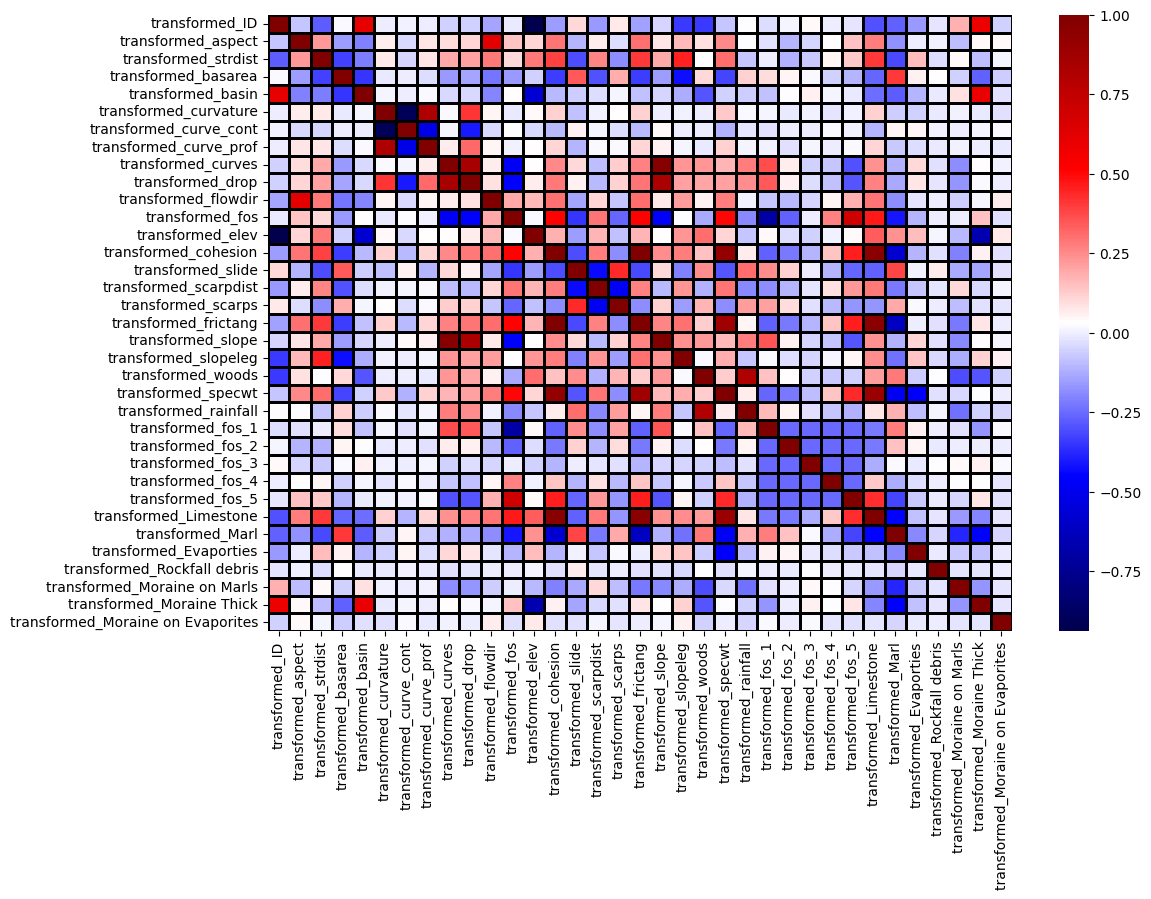

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(df_trans.corr(), linecolor='black', linewidths=1, cmap='seismic')

<Axes: >

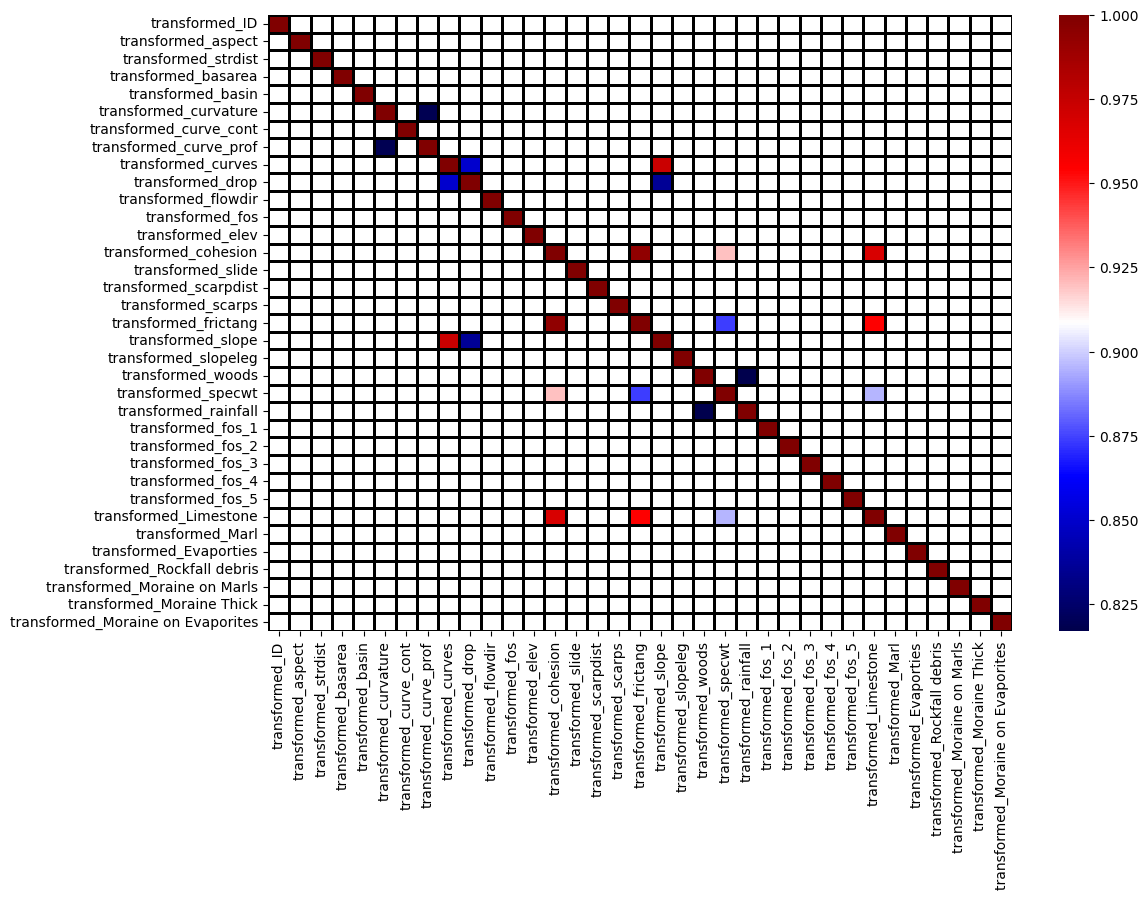

In [66]:
corr = df_trans.corr()
cond_corr = corr[corr>0.8]

#Plot Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(cond_corr, linecolor='black', linewidths=1, cmap='seismic')

In [67]:
cond_corr_sort = cond_corr
cond_corr_sort.replace(1, np.nan, inplace=True)
df_high_corr = cond_corr_sort.abs().unstack().drop_duplicates(keep='first').sort_values(ascending=False).to_frame(name='Correlation Value')
df_high_corr

,,Correlation Value
transformed_cohesion,transformed_frictang,0.993630
transformed_curves,transformed_slope,0.973462
transformed_cohesion,transformed_Limestone,0.968003
transformed_frictang,transformed_Limestone,0.954848
transformed_cohesion,transformed_specwt,0.919800
transformed_specwt,transformed_Limestone,0.895516
transformed_frictang,transformed_specwt,0.873909
transformed_curves,transformed_drop,0.850262
transformed_drop,transformed_slope,0.835961
transformed_curvature,transformed_curve_prof,0.818444


In [68]:
#Pearson Correlation of all features with Landslide Feature
df_trans[df_trans.columns[1:]].corr()['transformed_slide'][:].abs().sort_values(ascending=False)

,transformed_slide
transformed_slide,1.000000
transformed_scarps,0.438180
transformed_scarpdist,0.436005
transformed_Marl,0.381935
transformed_fos,0.353021
transformed_basarea,0.345430
transformed_frictang,0.312783
transformed_strdist,0.307812
transformed_rainfall,0.307206
transformed_cohesion,0.306148


In [69]:
print(df_trans.dtypes)
df_trans['transformed_basin'] = pd.to_numeric(df_trans['transformed_basin'], errors='coerce')

# Convert all columns of the DataFrame to numeric type, if necessary
df_trans = df_trans.apply(pd.to_numeric, errors='coerce')

# Now try running the original code again
df_corr_slide = pd.DataFrame(columns = ['Variable with transformed_slide', 'Pearson Value', 'P-Value'])

for i in comb_trans:
    pearson_coef, p_value = stats.pearsonr(df_trans[i], df_trans['transformed_slide'])
    tem_df_corr = pd.DataFrame({'Variable with transformed_slide': i, 'Pearson Value': [pearson_coef], 'P-Value': [p_value]})
    df_corr_slide = pd.concat([df_corr_slide, tem_df_corr], ignore_index = True) # Use concat instead of append

transformed_ID                         int64
transformed_aspect                   float64
transformed_strdist                  float64
transformed_basarea                  float64
transformed_basin                    float64
transformed_curvature                float64
transformed_curve_cont               float64
transformed_curve_prof               float64
transformed_curves                   float64
transformed_drop                     float64
transformed_flowdir                  float64
transformed_fos                      float64
transformed_elev                     float64
transformed_cohesion                 float64
transformed_slide                    float64
transformed_scarpdist                float64
transformed_scarps                   float64
transformed_frictang                 float64
transformed_slope                    float64
transformed_slopeleg                 float64
transformed_woods                    float64
transformed_specwt                   float64
transforme

<ipython-input-69-7077b322186b>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_corr_slide = pd.concat([df_corr_slide, tem_df_corr], ignore_index = True) # Use concat instead of append


In [70]:
#Sorting The Pearson Value and P-Value for Landslide Prediction
df_corr_slide.sort_values('Pearson Value', ascending=False).reset_index()

,index,Variable with transformed_slide,Pearson Value,P-Value
0,14,transformed_slide,1.000000,0.000000e+00
1,16,transformed_scarps,0.438180,0.000000e+00
2,29,transformed_Marl,0.381935,0.000000e+00
3,3,transformed_basarea,0.345430,0.000000e+00
4,22,transformed_rainfall,0.307206,0.000000e+00
5,20,transformed_woods,0.248347,5.839894e-288
6,23,transformed_fos_1,0.245940,2.850424e-282
7,24,transformed_fos_2,0.121625,6.338112e-69
8,18,transformed_slope,0.105376,4.242967e-52
9,0,transformed_ID,0.105090,7.978452e-52


In [71]:
upper = 0.3
lower = -0.3
var_for_multi=[]
for i in df_corr_slide['Variable with transformed_slide']:
    if df_corr_slide.loc[df_corr_slide["Variable with transformed_slide"] == i, ("Pearson Value")].values > upper:
        var_for_multi.append(i)
    elif df_corr_slide.loc[df_corr_slide["Variable with transformed_slide"] == i, ("Pearson Value")].values < lower:
        var_for_multi.append(i)
    else:
        continue

In [72]:
var_for_multi.pop()

'transformed_Marl'

In [73]:
var_for_multi

['transformed_strdist',
 'transformed_basarea',
 'transformed_fos',
 'transformed_cohesion',
 'transformed_slide',
 'transformed_scarpdist',
 'transformed_scarps',
 'transformed_frictang',
 'transformed_rainfall']

In [74]:
clean_var_for_multi = var_for_multi
target = 'transformed_slide'
clean_var_for_multi.remove(target)
rn = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(df_trans[clean_var_for_multi], df_trans['transformed_slide'], test_size=0.30, random_state=rn)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 6199
number of training samples: 14462


In [75]:
#Function for distribution of Training and Test Data comparison after the model being applied
def ComparisonPlot(green, blue, Title):
    plt.figure(figsize=(8, 10))

    ax1 = sns.distplot(green, hist=False, color="g", label='Actual Value')
    ax2 = sns.distplot(blue, hist=False, color="b", label='Predicted Value', ax=ax1)

    plt.title(Title)
    plt.xlabel('Slide')
    plt.ylabel('All Factors')
    plt.legend()

In [76]:
import pandas as pd
import pickle
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
features = ['strdist', 'basarea', 'fos', 'cohesion', 'scarpdist', 'scarps', 'frictang','rainfall']
target = 'slide'
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


param_grid = {
    'max_depth': [1, 3, 5, 10, 20, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize classifier
clf = tree.DecisionTreeClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=4)
best_param_tree = grid_search.fit(X_train, y_train).best_estimator_

# Make predictions
predictions_clf = best_param_tree.predict(X_test)

# Print the best parameters and accuracy score
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, predictions_clf))

# Cross-validation scores
cv_scores = cross_val_score(best_param_tree, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_clf))
print("Classification Report:\n", classification_report(y_test, predictions_clf))

boosted_clf = GradientBoostingClassifier()
boosted_clf.fit(X_train, y_train)
predictions_boosted = boosted_clf.predict(X_test)
print('Boosted Accuracy:', accuracy_score(y_test, predictions_boosted))



Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.8330375867075335
Cross-validation scores: [0.84894573 0.84341514 0.82538036 0.83679115 0.83852006]
Mean CV score: 0.8386104868000646
Confusion Matrix:
 [[3513  559]
 [ 476 1651]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      4072
         1.0       0.75      0.78      0.76      2127

    accuracy                           0.83      6199
   macro avg       0.81      0.82      0.82      6199
weighted avg       0.83      0.83      0.83      6199

Boosted Accuracy: 0.8385223423132764


In [77]:
import pickle
with open('boosted_clf.pkl', 'wb') as f:
    pickle.dump(boosted_clf, f)

print("Model saved as 'boosted_clf_model.pkl'")

Model saved as 'boosted_clf_model.pkl'


In [82]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('boosted_clf.pkl', 'rb') as f:
    model = pickle.load(f)

# List of features used in the model
feature_names = [
    'strdist',
    'basarea',
    'fos',
    'cohesion',
    'scarpdist',
    'scarps',
    'frictang',
    'rainfall'
]

user_input = {}

for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))
    user_input[feature] = value
new_data = pd.DataFrame([user_input])

# Use the loaded model to predict the outcome



Enter value for strdist: 644.9806
Enter value for basarea: 65600
Enter value for fos: 1.31829
Enter value for cohesion: 10
Enter value for scarpdist: 28.28427
Enter value for scarps: 0
Enter value for frictang: 23
Enter value for rainfall: 13.9777


In [80]:
print(type(model))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [83]:
prediction = model.predict(new_data)

# Print the prediction (1 means landslide will occur, 0 means it won't)
print("Prediction:", prediction[0])


# Optionally, if you want to see probabilities of the classes
probability = model.predict_proba(new_data)
print("Probability of Landslide (1):", probability[0][1])
print("Probability of No Landslide (0):", probability[0][0])

if(prediction[0]==0):
  print("Chances are low to have a landslide")
else:
  print("Chances are high to have a landslide")

Prediction: 1.0
Probability of Landslide (1): 0.6241240930051507
Probability of No Landslide (0): 0.3758759069948493
Chances are high to have a landslide


In [ ]:
print(pickle.format_version)

4.0
